In [50]:
# File system manangement
import time, os

# Mathematical functions
import math

# Data manipulation
import numpy as np
import pandas as pd

# Minisom and scikit-learn
from minisom import MiniSom
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Plotting and visualization
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [51]:
df_train = pd.read_csv("SOM_project/data/training.zip", compression='zip')

df_train.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [52]:
df_train_signal = df_train[df_train.Label == 's']
df_train_background = df_train[df_train.Label == 'b']

In [5]:
len(df_train_signal)

85667

In [6]:
print(df_train_signal.shape)
print(df_train_background.shape)

(85667, 33)


(164333, 33)

In [7]:
s_DER_pt_h = df_train_signal["DER_pt_h"].to_numpy()
b_DER_pt_h = df_train_background["DER_pt_h"].to_numpy()

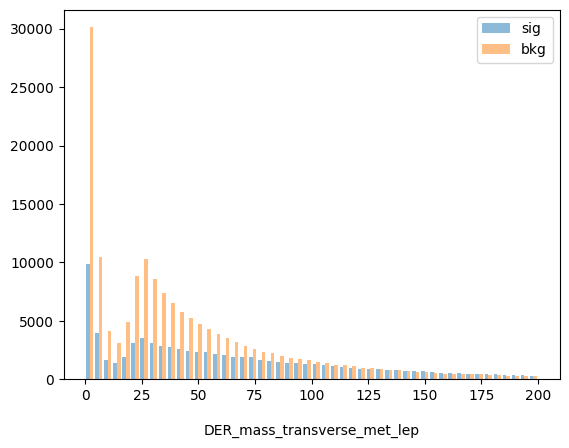

In [8]:
plt.hist([s_DER_pt_h, b_DER_pt_h], bins=50, range=[0,200], alpha=0.5, label=['sig', 'bkg'])
plt.xlabel('DER_pt_h', labelpad=15)
plt.xlabel('DER_mass_transverse_met_lep', labelpad=15)
plt.legend(loc='upper right')

In [53]:
from sklearn.preprocessing import StandardScaler

df_train['Label'].replace({'s': 1, 'b': 0}, inplace=True)
#Xb = np.array(df_train_background.drop(['EventId','Label','Weight'], axis=1).astype(float))
Xb = np.array(df_train.drop(['EventId','Label','Weight'], axis=1).astype(float))
# Normalize the signal data using StandardScaler
scaler = StandardScaler()
XB= scaler.fit_transform(Xb)
print(XB)
Xs = np.array(df_train_signal.drop(['EventId', 'Label', 'Weight'], axis=1).astype(float))
# Normalize the signal data using StandardScaler
scaler = StandardScaler()
XS = scaler.fit_transform(Xs)
#XS=XS[:10000]
print(XS)

[[ 0.46141372  0.06833197  0.40768027 ...  1.5668      1.55858439
   0.4125105 ]
 [ 0.51670419  0.55250482  0.54013641 ... -0.63936657 -0.63936694
  -0.27381996]
 [-2.33785898  3.19515553  1.09655998 ... -0.63936657 -0.63936694
  -0.29396985]
 ...
 [ 0.38016991  0.31931645 -0.13086367 ... -0.63936657 -0.63936694
  -0.31701723]
 [ 0.35431502 -0.84532397 -0.30297338 ... -0.63936657 -0.63936694
  -0.74543941]
 [-2.33785898  0.66533608 -0.25352276 ... -0.63936657 -0.63936694
  -0.74543941]]
[[ 0.26127244  0.65054373  0.81276013 ...  1.28270853  1.27505567
   0.22500639]
 [ 0.31206388 -0.10525728  1.27669992 ...  1.28042025  1.27445316
   0.89775551]
 [ 0.34249726 -0.71684829  0.66768282 ... -0.78116343 -0.78116463
  -0.61475438]
 ...
 [ 0.23651383  1.50887345  0.40087667 ... -0.78116343 -0.78116463
  -0.20600709]
 [ 0.21981053 -0.93238405 -0.63409821 ...  1.28134257  1.27559215
   4.60901386]
 [ 0.09822518  0.94470031 -0.21196193 ... -0.78116343 -0.78116463
  -0.49968367]]


In [54]:
df_train['Label'].replace({'s': 1, 'b': 0}, inplace=True)
# X = np.array(df_train_background.drop(['EventId','Label','Weight'], axis=1).astype(float))
X = np.array(df_train.drop(['EventId','Label','Weight'], axis=1).astype(float))
y = np.array(df_train['Label'])
# X=X[:10000]
# y=y[:10000]
# print(X)
#X = np.array(df_train_background[['DER_mass_transverse_met_lep','DER_mass_jet_jet','PRI_tau_pt','PRI_jet_leading_pt','DER_mass_vis','DER_sum_pt']].astype(float))
#X = np.array(df_train_background[['DER_mass_transverse_met_lep','DER_mass_jet_jet','PRI_tau_pt','PRI_jet_leading_pt','DER_mass_vis','DER_sum_pt']].astype(float))
#X= np.array(df_train[['DER_mass_transverse_met_lep','DER_mass_jet_jet','PRI_tau_pt']].astype(float))
#y = np.array(df_train['Label'])
X=X[:50000]
y=y[:50000]
print(X)

[[ 1.38470e+02  5.16550e+01  9.78270e+01 ...  1.24000e+00 -2.47500e+00
   1.13497e+02]
 [ 1.60937e+02  6.87680e+01  1.03235e+02 ... -9.99000e+02 -9.99000e+02
   4.62260e+01]
 [-9.99000e+02  1.62172e+02  1.25953e+02 ... -9.99000e+02 -9.99000e+02
   4.42510e+01]
 ...
 [ 1.28498e+02  1.85880e+01  6.99030e+01 ...  2.51800e+00  4.60000e-02
   1.90783e+02]
 [ 1.51113e+02  7.01060e+01  9.39910e+01 ... -9.99000e+02 -9.99000e+02
   0.00000e+00]
 [ 1.04210e+02  1.82680e+01  5.84380e+01 ... -9.99000e+02 -9.99000e+02
   4.93530e+01]]


In [ ]:
X.shape

In [61]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [ ]:
def classify(som, data):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(X_train, y_train)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# print(X_train)

In [63]:
# import Minisom package
from minisom import MiniSom

# Initialization and training
som_shape = (50, 50)
som = MiniSom(som_shape[0], som_shape[1], input_len=X_train.shape[1], sigma=1.5,
              neighborhood_function='gaussian', random_seed=1)  

som.random_weights_init(X_train)
som.train_random(X_train, 100000, verbose=True)

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 1.541021196052503


In [65]:
import pickle
# Save the trained SOM model
with open('som_model.pkl', 'wb') as model_file:
    pickle.dump(som, model_file)

In [66]:
# To load the model later, use the following code
with open('som_model.pkl', 'rb') as model_file:
    som_loaded = pickle.load(model_file)

In [ ]:
# U_matrix= som_loaded.distance_map()
# plt.figure(figsize=(8, 8))
# #plt.pcolor(U_matrix.T, cmap='viridis')  # plotting the distance map as background
# plt.pcolor(U_matrix, cmap='bone_r')
# plt.colorbar()
# plt.savefig(f'cluster_bkg_v5.pdf')

In [ ]:

# # Extract final weights
# weights = som_loaded.get_weights()

# # Find BMUs for test data
# bmus = np.array([som_loaded.winner(x) for x in XS])

# # Compute U-Matrix using the BMUs
# def compute_u_matrix(weights, bmus):
#     x, y, z = weights.shape
#     umatrix = np.zeros((x, y))
#     for i in range(x):
#         for j in range(y):
#             neighbors = []
#             if i > 0:
#                 neighbors.append(weights[i-1, j])
#             if i < x-1:
#                 neighbors.append(weights[i+1, j])
#             if j > 0:
#                 neighbors.append(weights[i, j-1])
#             if j < y-1:
#                 neighbors.append(weights[i, j+1])
#             umatrix[i, j] = np.mean([np.linalg.norm(weights[i, j] - neighbor) for neighbor in neighbors])
#     return umatrix

# u_matrix = compute_u_matrix(weights, bmus)
# # Plot U-Matrix
# plt.figure(figsize=(8, 8))
# plt.imshow(u_matrix, cmap='Greens')
# #plt.pcolor(U_matrix, cmap='bone_r')
# plt.colorbar()
# plt.title('U-Matrix for Test Data using Final Weights')
# plt.savefig(f'cluster_sgn_v4.pdf',dpi=300,bbox_inches='tight')

In [ ]:
# plt.figure(figsize=(12, 10))

# # Plot the U-matrix
# u_matrix = som_loaded.distance_map()  # U-matrix
# plt.imshow(u_matrix.T, cmap='bone_r', origin='lower')

# # Plot the winners
# # for cnt, xx in enumerate(XS):
# #     w = som_loaded.winner(xx)  # getting the winner
# #     plt.text(w[0], w[1], '1', color='r', fontsize=5, fontweight='bold', ha='center', va='center')

# plt.title('Winners in the SOM with U-matrix')
# plt.colorbar()
# plt.grid(True)
# plt.show()

In [ ]:
# Plotting the winners in the SOM
plt.figure(figsize=(10, 10))
for cnt, xx in enumerate(XS):
    w = som_loaded.winner(xx)  # getting the winner
    plt.text(w[0] + 0.5, w[1] + 0.5, '1', color='r', fontsize=12, fontweight='bold', ha='center', va='center')

In [ ]:
U_matrix= som.distance_map()
plt.figure(figsize=(8, 8))
#plt.pcolor(U_matrix.T, cmap='viridis')  # plotting the distance map as background
plt.pcolor(U_matrix.T, cmap='bone_r')
plt.colorbar()
plt.savefig(f'cluster_bkg.pdf')

In [ ]:
U_matrix= som_loaded.distance_map()
plt.figure(figsize=(8, 8))
#plt.pcolor(U_matrix.T, cmap='viridis')  # plotting the distance map as background
plt.pcolor(U_matrix.T, cmap='bone_r')
plt.colorbar()
plt.savefig(f'cluster_bkg_v3.pdf')